<a href="https://colab.research.google.com/github/anurag0078/deeplearing_assignments/blob/main/wine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
data_path='/content/gdrive/MyDrive/deep learning/assignment1/winequality-white.csv'

In [3]:
from pandas import read_csv
df = read_csv(data_path, sep=';')
print(df)
df.head()

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.0              0.27         0.36  ...       0.45      8.8        6
1               6.3              0.30         0.34  ...       0.49      9.5        6
2               8.1              0.28         0.40  ...       0.44     10.1        6
3               7.2              0.23         0.32  ...       0.40      9.9        6
4               7.2              0.23         0.32  ...       0.40      9.9        6
...             ...               ...          ...  ...        ...      ...      ...
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7
4897            6.0              0.21         0.38  ...       0.3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

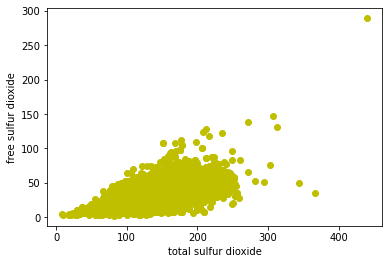

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel = 'total sulfur dioxide',
      ylabel = 'free sulfur dioxide')
ax.scatter(df['total sulfur dioxide'], df['free sulfur dioxide'], c='y')
plt.show()

In [8]:
df['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [9]:
 d1=df['quality']
# print(d1)

In [10]:
from sklearn.model_selection import train_test_split
train1 = df.drop(df.columns[11],axis=1)
labels = d1
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.33,random_state =16)



In [11]:
print(train1)
print(labels)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11

In [12]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(x_train)
# X_train = scaler.transform(x_train)
# X_test = scaler.transform(x_test)


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

model = Sequential()
model.add(Dense(64, input_dim= 11, activation = 'relu',kernel_regularizer='l2'))
# model.add(Dense(164, activation = 'relu',kernel_regularizer='l2'))
# model.add(Dense(64, activation = 'relu',kernel_regularizer='l2'))

model.add(Dense(32, activation = 'relu',kernel_regularizer='l2'))
model.add(Dense(8, activation = 'relu'))

model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [14]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

with tf.device('/gpu:0'):
  history=model.fit(x=x_train,y=y_train.values,
            validation_data=(x_test,y_test.values),
            batch_size=128,epochs=1000,callbacks=[early_stop])

Epoch 1/1000
26/26 [==============================] - 1s 15ms/step - loss: 13.0156 - mse: 12.4693 - val_loss: 3.8143 - val_mse: 3.3103
Epoch 2/1000
26/26 [==============================] - 0s 5ms/step - loss: 6.8781 - mse: 6.4037 - val_loss: 5.4400 - val_mse: 4.9966
Epoch 3/1000
26/26 [==============================] - 0s 7ms/step - loss: 4.5737 - mse: 4.1539 - val_loss: 4.6595 - val_mse: 4.2637
Epoch 4/1000
26/26 [==============================] - 0s 7ms/step - loss: 5.3532 - mse: 4.9755 - val_loss: 4.2970 - val_mse: 3.9379
Epoch 5/1000
26/26 [==============================] - 0s 8ms/step - loss: 4.7794 - mse: 4.4342 - val_loss: 5.8486 - val_mse: 5.5177
Epoch 6/1000
26/26 [==============================] - 0s 8ms/step - loss: 4.4253 - mse: 4.1043 - val_loss: 4.7360 - val_mse: 4.4251
Epoch 7/1000
26/26 [==============================] - 0s 7ms/step - loss: 4.1828 - mse: 3.8787 - val_loss: 4.3527 - val_mse: 4.0555
Epoch 8/1000
26/26 [==============================] - 0s 5ms/step - loss:

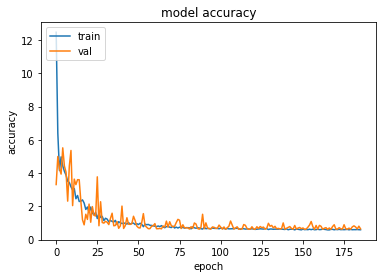

In [15]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
import math

results = model.evaluate(x_test, y_test, batch_size=128)
yhat = model.predict(x_test)
mse = mean_squared_error(y_test, yhat)
rmse = math. sqrt(mse)
print("rmse",rmse)


13/13 [==============================] - 0s 3ms/step - loss: 0.7251 - mse: 0.6468
rmse 0.804221411553339
